### @author : Jimmy Fails

## Training and testing for Android_ASL application


In [1]:
import math
import numpy as np
import tensorflow as tf
import glob
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
from tf_util import random_mini_batches, convert_to_one_hot, predict, data_load

C:\Users\shubhamkumar.singh\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# dictionary for classes
dictn={'A':0,
       'B':1,
       'C':2}

In [9]:
# loading data for training
x_train=[]
y_train=[]
classes=['A','B','C']
for clas in classes:
    (x_train, y_train) = data_load('asl-alphabet/asl_alphabet_train/'+clas+'/',int(classes.index(clas)), x_train, y_train)
    print(np.array(x_train).shape)
    print(np.array(y_train).shape)
print(y_train)    
X_train_orig=np.array(x_train)

(86, 200, 200, 3)
(86,)
(172, 200, 200, 3)
(172,)
(258, 200, 200, 3)
(258,)
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [11]:
# uploading the test data
# loading data for training
x_test=[]
y_test=[]
classes=['A','B','C']
for clas in classes:
    (x_test, y_test) = data_load('asl-alphabet/asl_alphabet_test/'+clas+'/',int(classes.index(clas)), x_test, y_test)
    print(np.array(x_test).shape)
    print(np.array(y_test).shape)
X_test_orig=np.array(x_test)

(428, 200, 200, 3)
(428,)
(468, 200, 200, 3)
(468,)
(896, 200, 200, 3)
(896,)


In [12]:
# output training and test variable processing
Y_train_orig=np.array(y_train)
Y_test_orig=np.array(y_test)
Y_train_orig = Y_train_orig.reshape((1, Y_train_orig.shape[0]))
Y_test_orig = Y_test_orig.reshape((1, Y_test_orig.shape[0]))

(258, 200, 200, 3)
[2]
y = 2


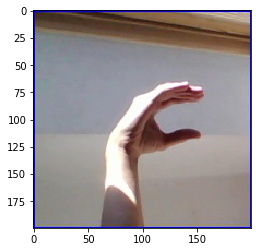

In [16]:
# checking the data
index = 250
print(X_train_orig.shape)
plt.imshow(X_train_orig[index])
print(Y_train_orig[:, index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [17]:
# processing the input
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
#print(type(Y_train))
Y_train = convert_to_one_hot(Y_train_orig, 3)
Y_test = convert_to_one_hot(Y_test_orig, 3)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 258
number of test examples = 896
X_train shape: (120000, 258)
Y_train shape: (3, 258)
X_test shape: (120000, 896)
Y_test shape: (3, 896)


In [ ]:
# processing data into the suitable format
x_train = np.array(x_train)
x_train = np.squeeze(x_train)
x_train = x_train.T
x_test  = np.array(x_test)
x_test  = np.squeeze(x_test)
x_test  = x_test.T

y_train = np.array(y_train)
y_train = y_train.reshape(1,9000)
print("here",y_test)
y_test  = np.array(y_test)
y_test  = y_test.reshape(1,3)

print("Shape of input training data (ip_nodes, ip_imgs) :",x_train.shape)
print("Shape of input test data (ip_nodes, ip_imgs) :",x_test.shape)


In [ ]:
print(y_test)
print(y_train)
y_train = convert_to_one_hot(y_train, 3)
y_test  = convert_to_one_hot(y_test, 3)
print(type(y_train))

In [ ]:
def create_placeholders(n_x,n_y):
    X=tf.placeholder(tf.float32,[n_x,None], name="X")
    Y=tf.placeholder(tf.float32,[n_y,None], name="Y")
    return X, Y
X, Y= create_placeholders(120000,3)
print("X = " + str(X))
print("Y = " + str(Y))

In [ ]:
def initialize_parameters():
    tf.set_random_seed(1)
    
    W1 = tf.get_variable("W1", [25,120000], initializer=tf.contrib.layers.xavier_initializer(seed=1)) 
    b1 = tf.get_variable("b1", [25,1],initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12,25], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b2 = tf.get_variable("b2", [12,1],initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [3,12], initializer=tf.contrib.layers.xavier_initializer(seed=1))
    b3 = tf.get_variable("b3", [3,1],initializer=tf.zeros_initializer())
    
    parameters={"W1":W1,
                "b1":b1,
                "W2":W2,
                "b2":b2,
                "W3":W3,
                "b3":b3}
    
    return parameters

tf.reset_default_graph()
with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))


In [ ]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    W3 = parameters["W3"]
    b3 = parameters["b3"]
    
    Z1 = tf.add(tf.matmul(W1, X), b1)
    A1 = tf.nn.relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1), b2)
    A2 = tf.nn.relu(Z2)
    Z3 = tf.add(tf.matmul(W3,A2), b3)
    
    return Z3

tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(120000, 3)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))
   

In [ ]:
# computing cost or the loss function
def compute_cost(Z3, Y):
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    cost   = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))
    
    return cost

tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(120000, 3)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)
    print("cost = " + str(cost))

In [ ]:
# building the model
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001, num_epochs=1500, minibatch_size=32, print_cost=True):
    tf.reset_default_graph()
    tf.set_random_seed(1)
    seed=3
    
    (n_x,m)= X_train.shape
    n_y    = Y_train.shape[0]
    costs  = []
    
    # creating placeholders
    X, Y      = create_placeholders(n_x, n_y)
    parameters= initialize_parameters()
    Z3        = forward_propagation(X, parameters)
    cost      = compute_cost(Z3, Y)
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    
    # initializing all variables
    init      = tf.global_variables_initializer()
    
    #starting the session
    with tf.Session() as sess:
        sess.run(init)
        
        for epoch in range(num_epochs):
            
            epoch_cost=0.
            num_minibatches=int(m/minibatch_size)
            seed=seed+1
            minibatches=random_mini_batches(X_train,Y_train,minibatch_size,seed)
            
            for minibatch in minibatches:
                
                (minibatch_X, minibatch_Y)=minibatch
                _, minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y:minibatch_Y}) 
                
                epoch_cost += minibatch_cost/num_minibatches
                    
        if print_cost == True and epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)
            
        parameters = sess.run(parameters)
        print("Parameters have been trained")
        
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
        print("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
        return parameters        
        

In [ ]:
parameters = model(x_train, y_train, x_test, y_test)